## STEP 0: What does the data look like?

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import the training and test data sets
df_train = pd.read_csv('train.csv', low_memory = False)
df_test = pd.read_csv('test.csv', low_memory = False)

list_train_columns = df_train.columns.tolist()  # these might come in handy later
list_test_columns = df_test.columns.tolist()

/home/sjdanglo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


#### Apart from the number of rows and columns, what other simple metrics are useful?

In [3]:
#Get number of rows and columns
training_dimensions = df_train.shape
testing_dimensions = df_test.shape

print("Training Dimensions: " + str(training_dimensions))
print("Testing Dimensions: " + str(testing_dimensions))

Training Dimensions: (18255, 1235)
Testing Dimensions: (27285, 1234)


#### Potentially interesting features in training dataset. Add to this dictionary and run the blocks of code below to generate the breakdown of female vs. male respondents. couldn't resolve the copy error python is throwing...but i know it won't affect the output

In [11]:
dict_features = {"Is Single/Not Married": {"DG3":"1"}, "Is Widow/Widower": {"DG3":"6"}, "Has Voter Card" : {"DG5_6" : "1"} }  #use a two level dictionary so we can store 1) the feature we're interetsed in, 2) the column that contains the feature, 3) the value of the answer we're interested in

list_of_features = dict_features.keys() #use the keys from the dictionary above to create a list of interesting columns

In [16]:
#Function for printing the female vs. male breakdown for a given question, AND 

for feature in list_of_features:
    question_answer_pair = list(dict_features[feature].items())  # turn the dict into a list...stack overflow suggested this
    column = str(question_answer_pair[0][0])
    answer = int(question_answer_pair[0][1]) #gotta change this to an int to get the comparison below to work

    
    df_question = df_train[[column, "is_female"]]  #dataframe with the question and is_female columns
    df_answer = df_question[df_question[column] == answer]  #dataframe with just the answer we're interested in
    
    gender_key = {1:"female", 0:"male"}
    df_answer['gender'] = df_answer['is_female'].apply(lambda x: gender_key[x]) #i keep forgetting the key for gender, so lets replace it for easier printing
    
    print("Breakdown for '" + str(feature) + "': \n")
    print(df_answer['gender'].value_counts())
    print("\n----------------------------------------\n")

    
   

Breakdown for 'Is Single/Not Married': 

male      1774
female    1132
Name: gender, dtype: int64

----------------------------------------

Breakdown for 'Is Widow/Widower': 

female    972
male      193
Name: gender, dtype: int64

----------------------------------------

Breakdown for 'Has Voter Card': 

female    8016
male      6903
Name: gender, dtype: int64

----------------------------------------



/home/sjdanglo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


#### Some odd features about the dataset
##### * Data dictionary is incorrect for values in 'is_female' column. See kaggle page: "is_female - the target variable you are going to predict. Note: in the data dictionary, Female is 2, male is 1, while in our transformed data, is_female=1 for female and is_female=0 for male." 
##### * Columns in the test data set are not always in the training set, e.g. "AA19" not in data only in data dictionary
##### * Answers to the survey questions are coded as numbers. How do we handle this? Do we store a dictionary of these values to keep track of the answers? i.e. "AB6", Q = "Day of interview", A = "1 - Monday", "2 - Tuesday", etc. --> {1: "Monday", 2: "Tuesday"}

## Step 1: Choosing features

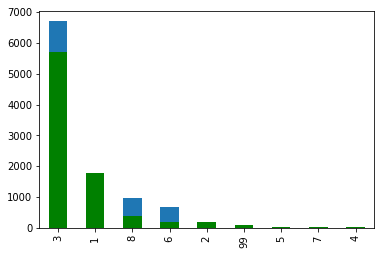

In [76]:
column = 'DG3'
fig, ax = plt.subplots()

df_train_female = df_train[df_train['is_female'] == 1]
df_train_male = df_train[df_train['is_female'] == 0]

df_train_female[column].value_counts().plot(ax = ax, kind = 'bar')  #women are in blue
df_train_male[column].value_counts().plot(ax = ax, kind = 'bar', color = 'green')

plt.show()

## STEP 2: One-hot encoding 

In [48]:
#Determine what the unique values in a given columns are
for feature in list_of_features:
    
    question_answer_pair = list(dict_features[feature].items())  # turn the dict into a list...stack overflow suggested this
    column = str(question_answer_pair[0][0])
    list_unique_values = df_train[column].unique().tolist()  #Get list of unique values
    
    dict_unique_values = {}
    for i, value in enumerate(list_unique_values):
        dict_unique_values[value] = i      
    
    #array of zeros with number of rows equal to number of rows in training set, and number of columns equal to number of unique values
    encoded_feature_array = np.zeros((df_train.shape[0], len(list_unique_values)), dtype = "int") 
    
    
    df_feature = df_train[[column]]   #create dataframe with one column--the column that contains the features we're interested in
    for row in df_feature.itertuples():
        array_column = dict_unique_values[row[1]]
        array_location = (row[0], array_column)
        encoded_feature_array[array_location] = 1   
    
    print(encoded_feature_array)     #this is an array for a single feature
    print(df_feature.head(3))
    print(df_feature.tail(3))
    print()


#We can later create a "feature vector" where feature_vector == [encoded_feature_array(column1), encodeD_feature_aray(column2)...
                                     
                                    
    
    
    
        
        
        
    

[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
   DG3
0    3
1    8
2    3
       DG3
18252    3
18253    3
18254    3

[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
   DG3
0    3
1    8
2    3
       DG3
18252    3
18253    3
18254    3

[[1 0]
 [1 0]
 [1 0]
 ..., 
 [1 0]
 [1 0]
 [1 0]]
   DG5_6
0      1
1      1
2      1
       DG5_6
18252      1
18253      1
18254      1



## STEP 2: Which machine algorithm to use? and why?? 